# QT-Assignment-02

by Guillaume IDAME KORALAGE

## Libraries

Let's import libraries we will need first.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Questions

The goal of this exercise is to calculate the cost of a limit order in a highly simplified setting (see lecture 2). We will consider that the bid-ask spread is zero, that the price follows a discrete random walk and a limit order is executed if the price reaches the level at which the order was placed.

### Q1. Generate 10,000 realizations of discrete random walks (increments {+1,-1}) of length T=500.

In [3]:
num_realizations = 10000
T = 500

realizations = np.random.choice([-1, 1], size=(num_realizations, T))
price_levels = np.cumsum(realizations, axis=1)

Let's plot the first 10 random walks to visualize.

Text(0.5, 1.0, 'Price Levels for the First 10 Realizations')

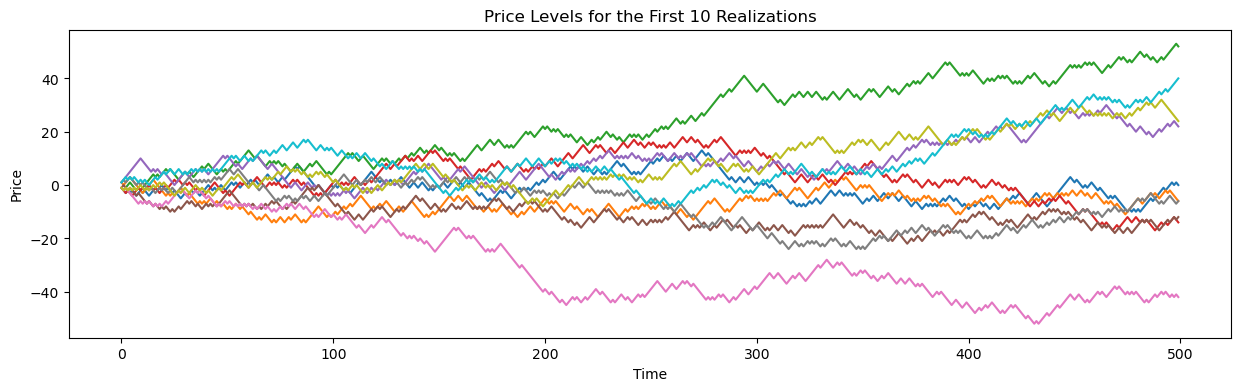

In [4]:
fig, ax = plt.subplots(figsize = (15, 4))

ax.plot(price_levels[0:10].T)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Price Levels for the First 10 Realizations')

### Q2. Consider a limit order placed at -10. What is the probability it will be hit?

First visualize.

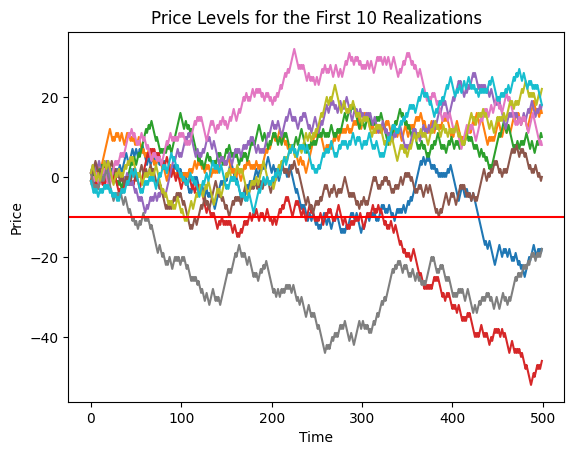

In [4]:
plt.plot(price_levels[0:10].T)
plt.xlabel('Time')
plt.ylabel('Price')
plt.axhline(-10, color='red')
plt.title('Price Levels for the First 10 Realizations')
plt.show()

In [5]:
limit_order_price = - 10
limit_order_hit = np.any(price_levels <= limit_order_price, axis=1)
probability_limit_order_hit = np.mean(limit_order_hit)

print("Probability of hitting the limit order at -10:", probability_limit_order_hit)

Probability of hitting the limit order at -10: 0.6564


### Q3. If it is not hit, what is then the average price at the end of the period (i.e. at t=500)?

In [6]:
realizations_not_hit = price_levels[~limit_order_hit]
average_price_not_hit = np.mean(realizations_not_hit[:, -1])

print("Average price at the end of the period (not hit):", average_price_not_hit)

Average price at the end of the period (not hit): 19.040162980209544


### Q4. Calculate the cost of the limit order with the formula given in the lecture.

In [7]:
cost_limit_order = (probability_limit_order_hit * limit_order_price) + ((1 - probability_limit_order_hit) * average_price_not_hit)

print("Cost of the limit order:", cost_limit_order)

Cost of the limit order: -0.021800000000000708


### Q5. Repeat the calculation for submission prices {0,-1,....-50} and plot execution probability, end price if the order was not hit and cost.

In [8]:
submission_prices = np.arange(0, -51, -1)

execution_probabilities = []
end_prices_not_hit = []
costs = []

for submission_price in submission_prices:

    limit_order_hit = np.any(price_levels <= submission_price, axis=1)
    
    execution_probability = np.mean(limit_order_hit)
    execution_probabilities.append(execution_probability)

    realizations_not_hit = price_levels[~limit_order_hit]
    
    end_price_not_hit = np.mean(realizations_not_hit[:, -1])
    end_prices_not_hit.append(end_price_not_hit)

    cost_limit_order = (execution_probability * submission_price) + ((1 - execution_probability) * end_price_not_hit)
    costs.append(cost_limit_order)

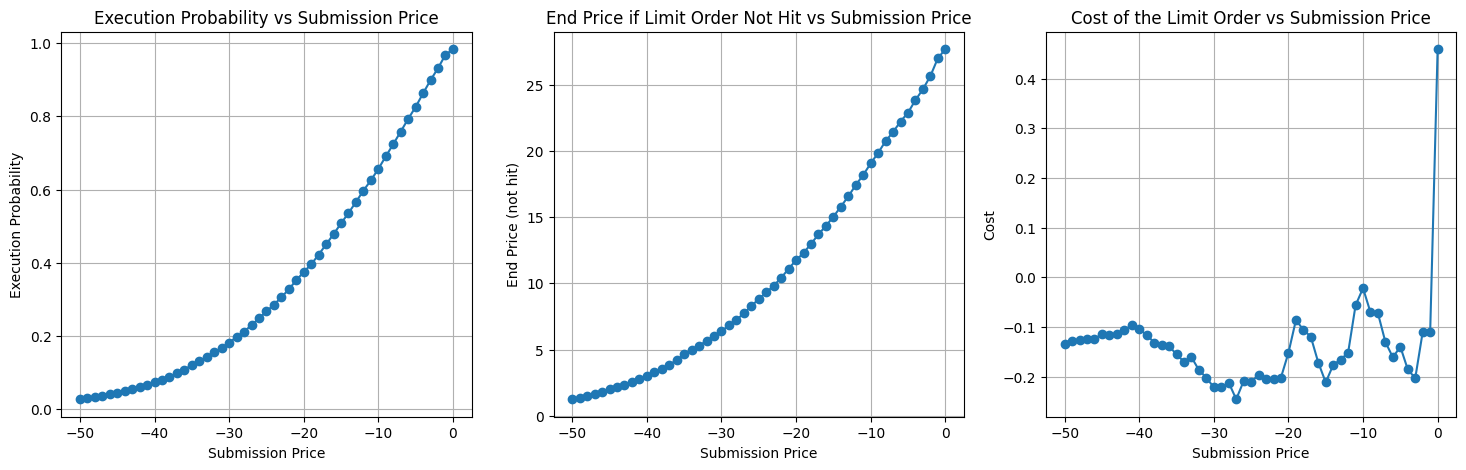

In [9]:
# Plotting
fig, axs = plt.subplots(1,3,figsize=(18, 5))

# Execution Probability Plot
axs[0].plot(submission_prices, execution_probabilities, marker='o')
axs[0].set_title('Execution Probability vs Submission Price')
axs[0].set_xlabel('Submission Price')
axs[0].set_ylabel('Execution Probability')
axs[0].grid()

# End Price if Not Hit Plot
axs[1].plot(submission_prices, end_prices_not_hit, marker='o')
axs[1].set_title('End Price if Limit Order Not Hit vs Submission Price')
axs[1].set_xlabel('Submission Price')
axs[1].set_ylabel('End Price (not hit)')
axs[1].grid()

# Cost Plot
axs[2].plot(submission_prices, costs, marker='o')
axs[2].set_title('Cost of the Limit Order vs Submission Price')
axs[2].set_xlabel('Submission Price')
axs[2].set_ylabel('Cost')
axs[2].grid()

### Q6. Bonus questions: Consider now a mean-reverting random walk, i.e. each increment is slightly anti-correlated to the previous one. How does this change the cost of a limit order? What happens if the random walk is trending instead?